In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('course+-+Quiz+P4+(1).csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Position        340 non-null    int64 
 1   Sexe            340 non-null    object
 2   Temps           340 non-null    object
 3   Dept            340 non-null    int64 
 4   Temps_secondes  340 non-null    int64 
 5   Age             340 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 16.1+ KB


## discretation

In [4]:
import seaborn as sns

import matplotlib.pyplot as plt


data['cat'] = 0

data.loc[data['Age'] <= 30, 'cat'] = '- 30'

data.loc[(data['Age'] > 30) & (data['Age'] <= 40), 'cat'] = '30-40'

data.loc[(data['Age'] > 40) & (data['Age'] <= 50), 'cat'] = '40-50'

data.loc[(data['Age'] > 50) & (data['Age'] <= 60), 'cat'] = '50-60'

data.loc[(data['Age'] > 60), 'cat'] = '60+'


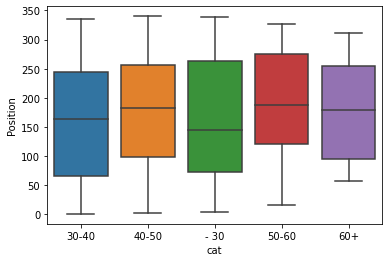

In [5]:
sns.boxplot(y='Position', x='cat', data=data, orient='v')

plt.show()

## calcul variance

In [6]:
import statsmodels.api as sm

Y = data['Position']

X = data[["Age"]].copy()

X['intercept'] = 1

result = sm.OLS(Y, X).fit()


a,b = result.params

print(a, b, result.rsquared)

ModuleNotFoundError: No module named 'statsmodels'

## ANOVA 

In [7]:
X = "Sexe" # qualitative

Y = "Temps_secondes" # quantitative


def eta_squared(x,y):

    moyenne_y = y.mean()

    classes = []

    for classe in x.unique():

        yi_classe = y[x==classe]

        classes.append({'ni': len(yi_classe),

                        'moyenne_classe': yi_classe.mean()})

    SCT = sum([(yj-moyenne_y)**2 for yj in y])

    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])

    return SCE/SCT


eta_squared(data[X],data[Y])

0.20400517398334017